In [704]:
import pandas as pd

In [705]:
import numpy as np

In [706]:
import seaborn as sns

In [707]:
import matplotlib.pyplot as plt

In [708]:
import warnings

In [709]:
warnings.filterwarnings('ignore')

In [710]:
df=pd.read_csv('winequality-red.csv')

In [711]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [712]:
df.shape

(1599, 12)

There are 1599 rows and 12 columns in the dataset

In [713]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

we have 11 feature variable and one target variable. The target variable=quality is of type integer. It is having ordinal data. Thus we have to use classification algorithms while predicting values.

In [714]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From above table, we can see that mean, 25,50 and 75 percentile of density is almost similar. Thus it does not have much significance in predicting quality of wine. We can drop it

In [715]:
df.drop(labels='density',axis=1,inplace=True)

In [716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 137.5 KB


There are no null values in all the features

In [717]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

There are six unique values in target variable

In [718]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Majority of the quality data is having value 5 or 6

In [719]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null value in dataset

In [720]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

# checking for skewness. We find that residual sugar, chlorides,free sulfur dioxide,total sulfur dioxide and sulphates data have skewness

In [721]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

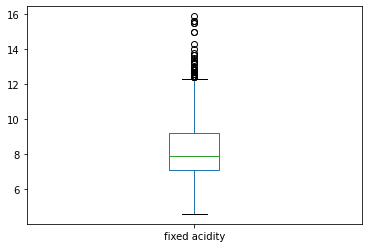

In [722]:
df['fixed acidity'].plot.box()

There are outliers in fixed acidity column

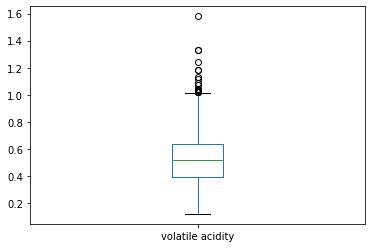

In [723]:
df['volatile acidity'].plot.box()

There are outliers in volatile acidity column

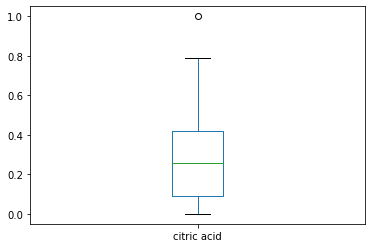

In [724]:
df['citric acid'].plot.box()

There are few outliers in citric acid column

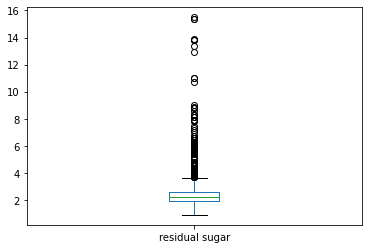

In [725]:
df['residual sugar'].plot.box()

there are outliers in residual sugar column

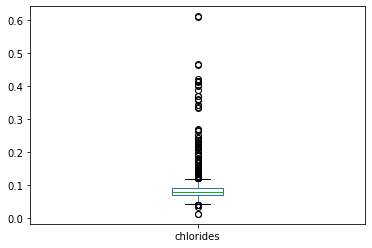

In [726]:
df['chlorides'].plot.box()

There are outliers in chlorides

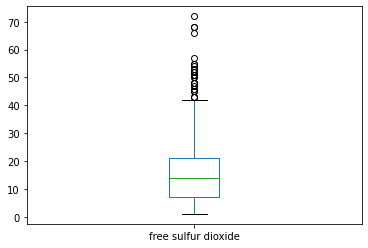

In [727]:
df['free sulfur dioxide'].plot.box()

There are outliers in free sulfur dioxide

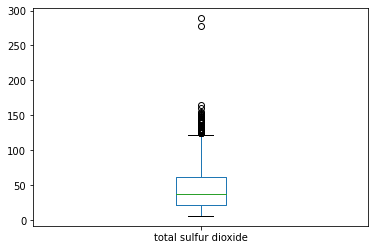

In [728]:
df['total sulfur dioxide'].plot.box()

there are outliers in total sulfur dioxide

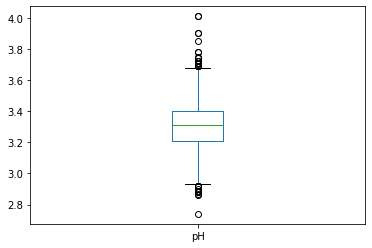

In [729]:
df['pH'].plot.box()

there are outliers in pH

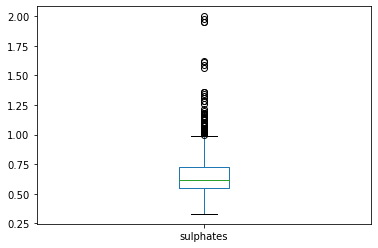

In [730]:
df['sulphates'].plot.box()

there are outliers in sulphates

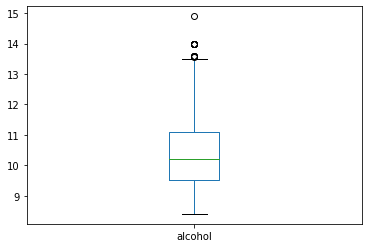

In [731]:
df['alcohol'].plot.box()

there are outliers in alcohol

In [732]:
from scipy.stats import zscore

In [733]:
z=np.abs(zscore(df))

In [734]:
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [735]:
threshold=3

In [736]:
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  451,  459,
        467,  480,  494,  515,  517,  544,  554,  555,  557,  568,  584,
        588,  591,  595,  614,  636,  639,  649,  649,  651,  652,  652,
        652,  672,  672,  684,  690,  690,  692,  692,  695,  723,  724,
        730,  754,  776,  777,  795,  821,  832,  899,  911,  917,  923,
        925,  926,  982, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244, 1244,
       1244, 1260, 1269, 1270, 1288, 1289, 1295, 1296, 1299, 1299, 1300,
       1312, 1316, 1319, 1319, 1321, 1358, 1367, 1

In [737]:
df_new=df[(z<3).all(axis=1)]

In [738]:
df_new.shape

(1458, 11)

We have removed all the outliers from the dataset. The new dataset have 1458 rows and 11 columns

In [739]:
df.shape

(1599, 11)

Original dataframe had 1599 rows. New dataframe has 141 rows less than old dataframe

In [740]:
Data_loss=((1599-1458)/1599)*100

In [741]:
Data_loss

8.818011257035648

We see that data loss is more than 8% . Thus we will not use new dataframe and continue with old dataframe and not remove outliers

In [742]:
df_new.skew()

fixed acidity           0.817852
volatile acidity        0.376121
citric acid             0.285837
residual sugar          2.436913
chlorides               2.168360
free sulfur dioxide     0.861713
total sulfur dioxide    1.164213
pH                      0.089079
sulphates               0.880534
alcohol                 0.761093
quality                 0.403589
dtype: float64

In [743]:
dfcor=df.corr()

In [744]:
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,-0.066495,0.042947,-0.205654,-0.185100
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,-0.196648,1.000000,0.093595,0.251397
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,0.205633,0.093595,1.000000,0.476166


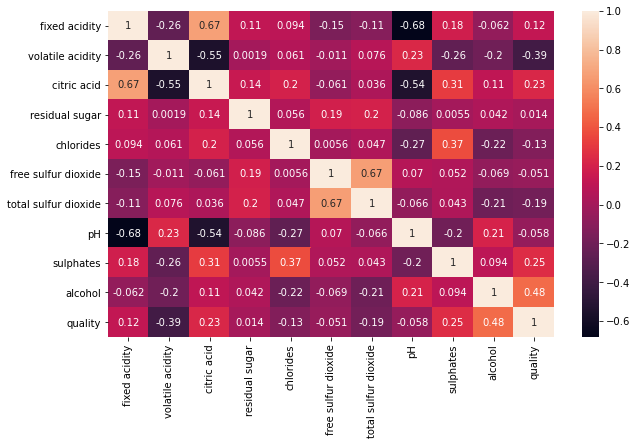

In [745]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,annot=True)

We see a negative correlation between quality and total sulfur dioxide,chloeides,volatile acidity,free sulfur dioxide and PH

No feature has more than 0.5 correlation with quality. We cannot drop all features. Thus we will ignore the same

A high corelation is observed between citri acid and fixed acidity. We can remove any one of them but we will not as there are only 10 feature sets to predict quality and dropping one feature will have impact on prediction.

A high corelation is also observed between total and free sulfur dioxide but for the reason as explained above we will not drop any one.

In [746]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [747]:
df['chlorides']=np.log(df['chlorides'])

In [748]:
df['residual sugar']=np.log(df['residual sugar'])

In [749]:
df['sulphates']=np.log(df['sulphates'])

In [750]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          1.806864
chlorides               1.745215
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
pH                      0.193683
sulphates               0.921867
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [751]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Skewness removed out of the data

In [752]:
bins=(0,6,10)

In [753]:
score=['good','not good']

In [754]:
df['quality']=pd.cut(df['quality'],bins=bins,labels=score)

In [755]:
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00        0.641854  -2.577022   
1               7.8             0.880         0.00        0.955511  -2.322788   
2               7.8             0.760         0.04        0.832909  -2.385967   
3              11.2             0.280         0.56        0.641854  -2.590267   
4               7.4             0.700         0.00        0.641854  -2.577022   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08        0.693147  -2.407946   
1595            5.9             0.550         0.10        0.788457  -2.780621   
1596            6.3             0.510         0.13        0.832909  -2.577022   
1597            5.9             0.645         0.12        0.693147  -2.590267   
1598            6.0             0.310         0.47        1.280934  -2.703063  

In [756]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.641854,-2.577022,11.0,34.0,3.51,-0.579818,9.4,good
1,7.8,0.880,0.00,0.955511,-2.322788,25.0,67.0,3.20,-0.385662,9.8,good
2,7.8,0.760,0.04,0.832909,-2.385967,15.0,54.0,3.26,-0.430783,9.8,good
3,11.2,0.280,0.56,0.641854,-2.590267,17.0,60.0,3.16,-0.544727,9.8,good
4,7.4,0.700,0.00,0.641854,-2.577022,11.0,34.0,3.51,-0.579818,9.4,good
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.693147,-2.407946,32.0,44.0,3.45,-0.544727,10.5,good
1595,5.9,0.550,0.10,0.788457,-2.780621,39.0,51.0,3.52,-0.274437,11.2,good
1596,6.3,0.510,0.13,0.832909,-2.577022,29.0,40.0,3.42,-0.287682,11.0,good
1597,5.9,0.645,0.12,0.693147,-2.590267,32.0,44.0,3.57,-0.342490,10.2,good


In [757]:
df['quality'].unique()

[good, not good]
Categories (2, object): [good < not good]

In [758]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   pH                    1599 non-null   float64 
 8   sulphates             1599 non-null   float64 
 9   alcohol               1599 non-null   float64 
 10  quality               1599 non-null   category
dtypes: category(1), float64(10)
memory usage: 126.7 KB


In [759]:
df['quality']=df['quality'].map({'good':1,'not good':0})

In [760]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.641854,-2.577022,11.0,34.0,3.51,-0.579818,9.4,1
1,7.8,0.88,0.00,0.955511,-2.322788,25.0,67.0,3.20,-0.385662,9.8,1
2,7.8,0.76,0.04,0.832909,-2.385967,15.0,54.0,3.26,-0.430783,9.8,1
3,11.2,0.28,0.56,0.641854,-2.590267,17.0,60.0,3.16,-0.544727,9.8,1
4,7.4,0.70,0.00,0.641854,-2.577022,11.0,34.0,3.51,-0.579818,9.4,1


In [761]:
df['quality'].value_counts()

1    1382
0     217
Name: quality, dtype: int64

There is a class imbalance in the problem. Using SMOTE

In [762]:
x=df.iloc[:,0:10]

In [763]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.641854,-2.577022,11.0,34.0,3.51,-0.579818,9.4
1,7.8,0.880,0.00,0.955511,-2.322788,25.0,67.0,3.20,-0.385662,9.8
2,7.8,0.760,0.04,0.832909,-2.385967,15.0,54.0,3.26,-0.430783,9.8
3,11.2,0.280,0.56,0.641854,-2.590267,17.0,60.0,3.16,-0.544727,9.8
4,7.4,0.700,0.00,0.641854,-2.577022,11.0,34.0,3.51,-0.579818,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.693147,-2.407946,32.0,44.0,3.45,-0.544727,10.5
1595,5.9,0.550,0.10,0.788457,-2.780621,39.0,51.0,3.52,-0.274437,11.2
1596,6.3,0.510,0.13,0.832909,-2.577022,29.0,40.0,3.42,-0.287682,11.0
1597,5.9,0.645,0.12,0.693147,-2.590267,32.0,44.0,3.57,-0.342490,10.2


In [764]:
y=df.iloc[:,-1]

In [765]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality, Length: 1599, dtype: category
Categories (2, int64): [1 < 0]

In [766]:
x.shape

(1599, 10)

In [767]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [768]:
y.shape

(1599,)

In [769]:
from sklearn.preprocessing import StandardScaler

In [770]:
scale=StandardScaler()

In [771]:
x=scale.fit_transform(x)

In [772]:
x

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.60206208, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.26665831, -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
         0.06477406, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.70505615,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.45982537, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.13308595,  0.54162988]])

Scaled all feature variables

In [773]:
x.shape

(1599, 10)

In [774]:
dx=pd.DataFrame(x,columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol'])

In [775]:
dx

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.583150,-0.218763,-0.466193,-0.379133,1.288643,-0.602062,-0.960246
1,-0.298547,1.967442,-1.391472,0.294627,0.558443,0.872638,0.624363,-0.719933,0.266658,-0.584777
2,-0.298547,1.297065,-1.186070,-0.048478,0.365302,-0.083669,0.229047,-0.331177,0.064774,-0.584777
3,1.654856,-1.384443,1.484154,-0.583150,-0.259254,0.107592,0.411500,-0.979104,-0.445052,-0.584777
4,-0.528360,0.961877,-1.391472,-0.583150,-0.218763,-0.466193,-0.379133,1.288643,-0.602062,-0.960246
...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.439605,0.298111,1.542054,-0.075043,0.899886,-0.445052,0.072294
1595,-1.390155,0.123905,-0.877968,-0.172877,-0.841175,2.211469,0.137820,1.353436,0.764320,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.048478,-0.218763,1.255161,-0.196679,0.705508,0.705056,0.541630
1597,-1.390155,0.654620,-0.775267,-0.439605,-0.259254,1.542054,-0.075043,1.677400,0.459825,-0.209308


In [776]:
from imblearn.over_sampling import SMOTE

In [777]:
smt=SMOTE()

In [778]:
trainx,trainy=smt.fit_resample(dx,y)

In [779]:
trainx

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.583150,-0.218763,-0.466193,-0.379133,1.288643,-0.602062,-0.960246
1,-0.298547,1.967442,-1.391472,0.294627,0.558443,0.872638,0.624363,-0.719933,0.266658,-0.584777
2,-0.298547,1.297065,-1.186070,-0.048478,0.365302,-0.083669,0.229047,-0.331177,0.064774,-0.584777
3,1.654856,-1.384443,1.484154,-0.583150,-0.259254,0.107592,0.411500,-0.979104,-0.445052,-0.584777
4,-0.528360,0.961877,-1.391472,-0.583150,-0.218763,-0.466193,-0.379133,1.288643,-0.602062,-0.960246
...,...,...,...,...,...,...,...,...,...,...
2759,-0.346750,-1.651576,0.382186,-0.505498,-1.371674,-0.980614,-1.054766,0.295887,0.534802,0.998038
2760,-0.058310,-0.847796,0.349681,-0.202804,-0.706053,-0.312592,-0.632500,-0.678654,0.767358,-0.124147
2761,-0.403592,0.434496,-1.326326,-0.962351,-0.471636,-0.447638,-0.832317,0.387830,-0.838484,-0.694757
2762,-0.448963,-1.156425,0.386181,0.233872,-0.074902,0.923940,-0.315833,-0.470210,-0.230896,2.007654


In [780]:
trainy

0       1
1       1
2       1
3       1
4       1
       ..
2759    0
2760    0
2761    0
2762    0
2763    0
Name: quality, Length: 2764, dtype: category
Categories (2, int64): [1 < 0]

In [781]:
trainx.shape

(2764, 10)

In [782]:
trainy.shape

(2764,)

In [783]:
trainy.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

Removed class imbalance using SMOTE

In [784]:
from sklearn.model_selection import train_test_split

In [785]:
from sklearn.metrics import accuracy_score

In [786]:
from sklearn.tree import DecisionTreeClassifier

In [787]:
from sklearn.ensemble import RandomForestClassifier

In [788]:
from sklearn.svm import SVC

In [789]:
from sklearn.metrics import classification_report

In [790]:
from sklearn.neighbors import KNeighborsClassifier

In [791]:
from sklearn.metrics import confusion_matrix

In [792]:
maxAccu=0

In [793]:
maxRS=0

In [794]:
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(dx,y,test_size=.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,'on random state',maxRS)

Best Accuracy is 0.9104166666666667 on random state 189


In [795]:
x_train,x_test,y_train,y_test=train_test_split(dx,y,test_size=.30,random_state=189)

In [796]:
DTC=DecisionTreeClassifier()

In [797]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [798]:
pred=DTC.predict(x_test)

In [799]:
cla=classification_report(y_test,pred)
acc=accuracy_score(y_test,pred)
con=confusion_matrix(y_test,pred)

In [800]:
print(acc)
print(cla)
print(con)

0.9
              precision    recall  f1-score   support

           0       0.62      0.72      0.67        67
           1       0.95      0.93      0.94       413

    accuracy                           0.90       480
   macro avg       0.79      0.82      0.80       480
weighted avg       0.91      0.90      0.90       480

[[ 48  19]
 [ 29 384]]


In [801]:
knn=KNeighborsClassifier(n_neighbors=5)

In [802]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [803]:
knn.score(x_train,y_train)

0.900804289544236

In [804]:
predknn=knn.predict(x_test)

In [805]:
cla2=classification_report(y_test,predknn)
print(cla2)

              precision    recall  f1-score   support

           0       0.52      0.40      0.45        67
           1       0.91      0.94      0.92       413

    accuracy                           0.86       480
   macro avg       0.71      0.67      0.69       480
weighted avg       0.85      0.86      0.86       480



In [806]:
acc2=accuracy_score(y_test,predknn)

In [807]:
print(acc2)

0.8645833333333334


In [808]:
con2=confusion_matrix(y_test,predknn)

In [809]:
print(con2)

[[ 27  40]
 [ 25 388]]


In [810]:
SV=SVC()

In [811]:
SV.fit(x_train,y_train)

SVC()

In [812]:
pred=SV.predict(x_test)

In [813]:
cla3=classification_report(y_test,pred)

In [814]:
print(cla3)

              precision    recall  f1-score   support

           0       0.74      0.25      0.38        67
           1       0.89      0.99      0.94       413

    accuracy                           0.88       480
   macro avg       0.81      0.62      0.66       480
weighted avg       0.87      0.88      0.86       480



In [815]:
acc3=accuracy_score(y_test,pred)

In [816]:
print(acc3)

0.8833333333333333


In [817]:
con3=confusion_matrix(y_test,pred)

In [818]:
print(con3)

[[ 17  50]
 [  6 407]]


In [819]:
rf=RandomForestClassifier(n_estimators=100,random_state=189)

In [820]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=189)

In [821]:
predrf=rf.predict(x_test)

In [822]:
acc4=accuracy_score(y_test,predrf)

In [823]:
print(acc4)

0.90625


In [824]:
cla4=classification_report(y_test,predrf)

In [825]:
print(cla4)

              precision    recall  f1-score   support

           0       0.75      0.49      0.59        67
           1       0.92      0.97      0.95       413

    accuracy                           0.91       480
   macro avg       0.84      0.73      0.77       480
weighted avg       0.90      0.91      0.90       480



In [826]:
con4=confusion_matrix(y_test,predrf)

In [827]:
print(con4)

[[ 33  34]
 [ 11 402]]


In [828]:
from sklearn.model_selection import cross_val_score

In [829]:
print(cross_val_score(DTC,dx,y,cv=5).mean())

0.7848510971786834


In [830]:
print(cross_val_score(knn,dx,y,cv=5).mean())

0.8436559561128527


In [831]:
print(cross_val_score(SV,dx,y,cv=5).mean())

0.8680427115987459


In [832]:
print(cross_val_score(rf,dx,y,cv=5).mean())

0.8699275078369906


From comparision of accuracy score and cross val score, we find Randomforest classifier as best model

In [833]:
from sklearn.model_selection import GridSearchCV

In [834]:
parameter={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'warm_start':['True','False'],'oob_score':['True','False']}

In [835]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [836]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'oob_score': ['True', 'False'],
                         'warm_start': ['True', 'False']})

In [837]:
GCV.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'oob_score': 'True',
 'warm_start': 'False'}

In [838]:
Final_mod=RandomForestClassifier(criterion='entropy',max_features='auto',oob_score=True,warm_start=False)

In [839]:
Final_mod.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', oob_score=True)

In [840]:
pred=Final_mod.predict(x_test)

In [841]:
acc=accuracy_score(y_test,pred)

In [842]:
print(acc)

0.9083333333333333


In [843]:
import joblib

In [844]:
joblib.dump(Final_mod,'RedWinequality.pkl')

['RedWinequality.pkl']